In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Funciones auxiliares generales
def filtrar_outliers(df, columna, p_inf=0.01, p_sup=0.99):
    """Filtra valores extremos de una columna numérica usando percentiles."""
    lim_inf = df[columna].quantile(p_inf)
    lim_sup = df[columna].quantile(p_sup)
    return df[df[columna].between(lim_inf, lim_sup)]

# Cargar y preparar los datos
def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
    df["gluc"] = (df["gluc"] > 1).astype(int)
    df["age_years"] = (df["age"] / 365).astype(int)
    return df

def agregar_bmi(df):
    """Calcula el IMC y agrega las columnas 'BMI' e 'overweight' al DataFrame."""
    bmi = df["weight"] / ((df["height"] / 100) ** 2)
    df["BMI"] = bmi
    df["overweight"] = (bmi > 25).astype(int)
    return df


In [25]:
ruta = "C:/Users/trezz/Desktop/proyectosDeDesarrolloWeb/MedicalExamination/data/medical_examination.csv"
df = cargar_datos(ruta)
df = agregar_bmi(df)

# Visualización clínica con catplot

In [26]:
def catplot_variable(df, variable="BMI", grupo="cardio", tipo="box", palette="Set2",
                     p_inf=0.01, p_sup=0.99, min_val=None, max_val=None, max_muestras=None):
    """
    Visualización categórica de una variable numérica por grupo, con filtrado automático de outliers y opcional clínico.
    
    Parámetros:
    - df: DataFrame original sin filtrar
    - variable: variable numérica a mostrar
    - grupo: variable categórica para agrupar
    - tipo: tipo de gráfico ('box', 'violin', 'strip', 'swarm', 'point', 'bar')
    - palette: paleta de colores para Seaborn o diccionario personalizado
    - p_inf, p_sup: percentiles para filtrado de outliers
    - min_val, max_val: valores clínicos mínimos y máximos opcionales
    """
    # Filtrado por percentiles
    df_filtrado = filtrar_outliers(df, variable, p_inf, p_sup)

    # Filtrado clínico adicional si se especifica
    if min_val is not None and max_val is not None:
        df_filtrado = df_filtrado[(df_filtrado[variable] >= min_val) & (df_filtrado[variable] <= max_val)]

    # Limitar cantidad de muestras si se especifica
    if max_muestras is not None and len(df_filtrado) > max_muestras:
        df_filtrado = df_filtrado.sample(max_muestras, random_state=42)

    # Resumen estadistico
    resumen = df_filtrado.groupby(grupo)[variable].describe().round(2)
    print(f"\nResumen estadístico de '{variable}' por '{grupo}':\n")
    print(resumen)

    # Visualización
    sns.catplot(
        data=df_filtrado,
        x=grupo,
        y=variable,
        kind=tipo,
        hue=grupo,
        palette=palette,
        legend=False,
        height=4,
        aspect=1.2
    )
    plt.title(f"{variable} por {grupo} ({tipo}plot)")
    plt.tight_layout()
    plt.show()
    plt.close()






Resumen estadístico de 'BMI' por 'active':

          count   mean   std    min    25%    50%    75%    max
active                                                         
0       13482.0  27.51  4.88  18.61  23.88  26.45  30.42  44.41
1       55121.0  27.35  4.72  18.61  23.88  26.37  30.10  44.43


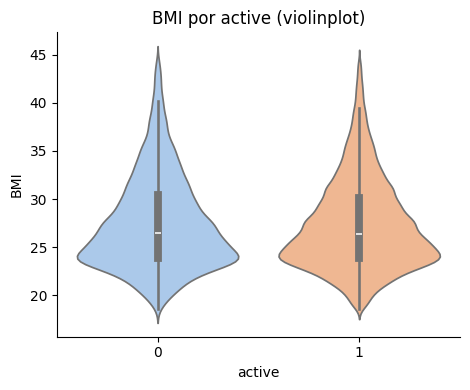


Resumen estadístico de 'ap_hi' por 'cardio':

          count    mean    std   min    25%    50%    75%    max
cardio                                                          
0       34768.0  119.68  12.27  90.0  110.0  120.0  120.0  180.0
1       34542.0  133.88  16.70  90.0  120.0  130.0  140.0  180.0


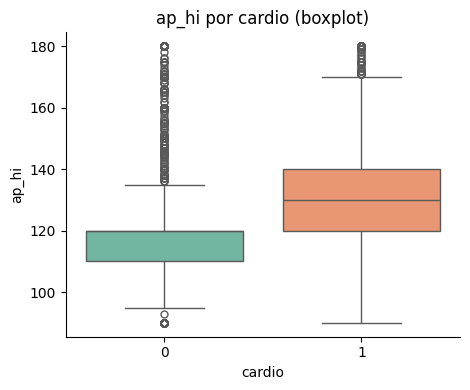


Resumen estadístico de 'ap_hi' por 'cardio':

          count    mean    std   min    25%    50%    75%    max
cardio                                                          
0       34768.0  119.68  12.27  90.0  110.0  120.0  120.0  180.0
1       34542.0  133.88  16.70  90.0  120.0  130.0  140.0  180.0


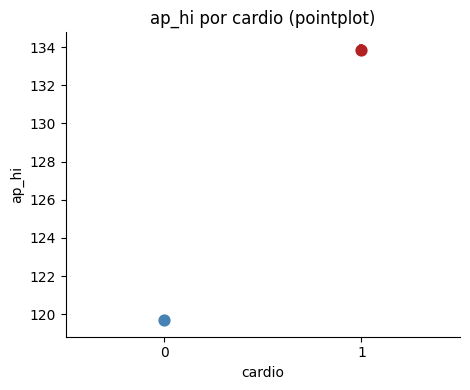


Resumen estadístico de 'ap_lo' por 'cardio':

          count   mean   std   min   25%   50%   75%    max
cardio                                                     
0       34760.0  78.21  8.14  60.0  70.0  80.0  80.0  130.0
1       34050.0  84.60  9.45  60.0  80.0  80.0  90.0  130.0


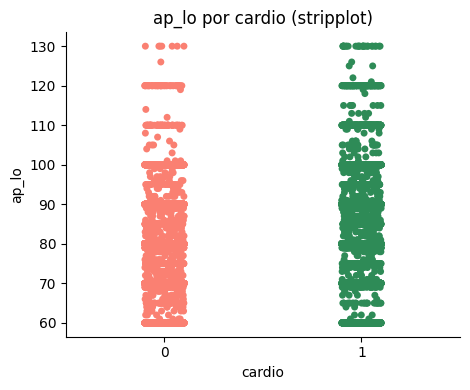

In [27]:
catplot_variable(df, variable="BMI", grupo="active", tipo="violin", palette="pastel")
catplot_variable(df, variable="ap_hi", grupo="cardio", tipo="box", palette="Set2")
catplot_variable(df,variable="ap_hi",grupo="cardio",tipo="point",palette={0: "steelblue", 1: "firebrick"})
catplot_variable(df,variable="ap_lo",grupo="cardio",tipo="strip",palette={0: "salmon", 1: "seagreen"},min_val=40,max_val=130)


Resumen estadístico de 'weight' por 'cardio':

        count   mean    std   min   25%   50%   75%    max
cardio                                                    
0       258.0  70.12  12.41  48.0  61.0  69.0  78.0  115.0
1       242.0  76.55  14.14  48.0  66.0  75.0  85.0  116.0


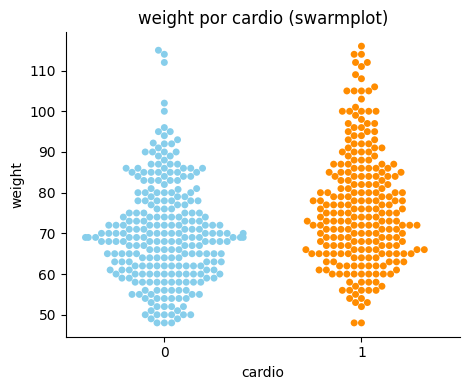


Resumen estadístico de 'gluc' por 'cardio':

          count  mean   std  min  25%  50%  75%  max
cardio                                              
0       35021.0  0.12  0.32  0.0  0.0  0.0  0.0  1.0
1       34979.0  0.18  0.39  0.0  0.0  0.0  0.0  1.0


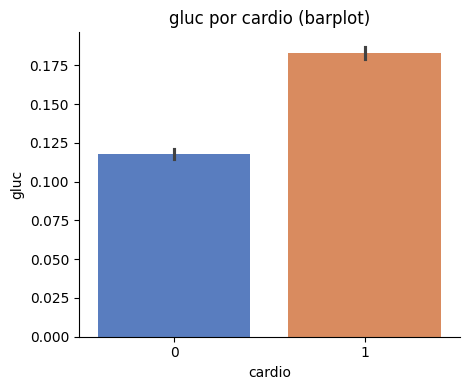

In [28]:
catplot_variable(df,variable="weight", grupo="cardio",tipo="swarm",palette={0: "skyblue", 1: "darkorange"},min_val=40,max_val=150, max_muestras=500)
catplot_variable(df,variable="gluc",grupo="cardio",tipo="bar",palette="muted")

# Jointplot

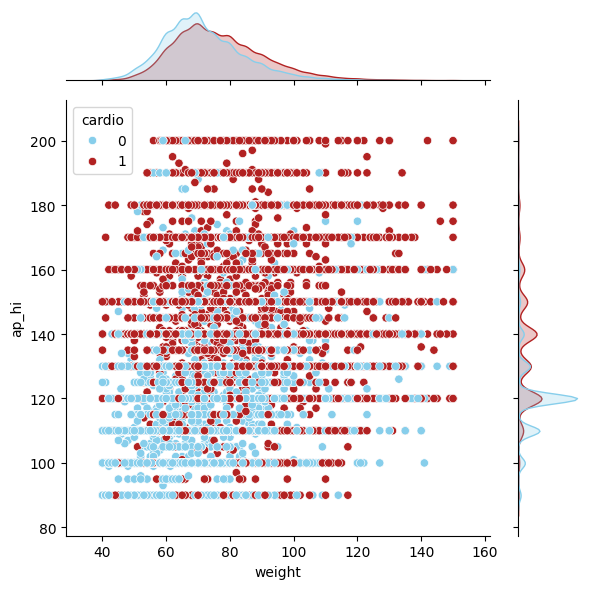

In [35]:
df_filtrado = df[(df["weight"] >= 40) & (df["weight"] <= 150) & (df["ap_hi"] >= 90) & (df["ap_hi"] <= 200)]

sns.jointplot(
    data=df_filtrado,
    x="weight",
    y="ap_hi",
    kind="scatter",         
    hue="cardio",     
    palette={0: "skyblue", 1: "firebrick"},
    height=6
)
plt.tight_layout()
plt.show()

# Pairplot

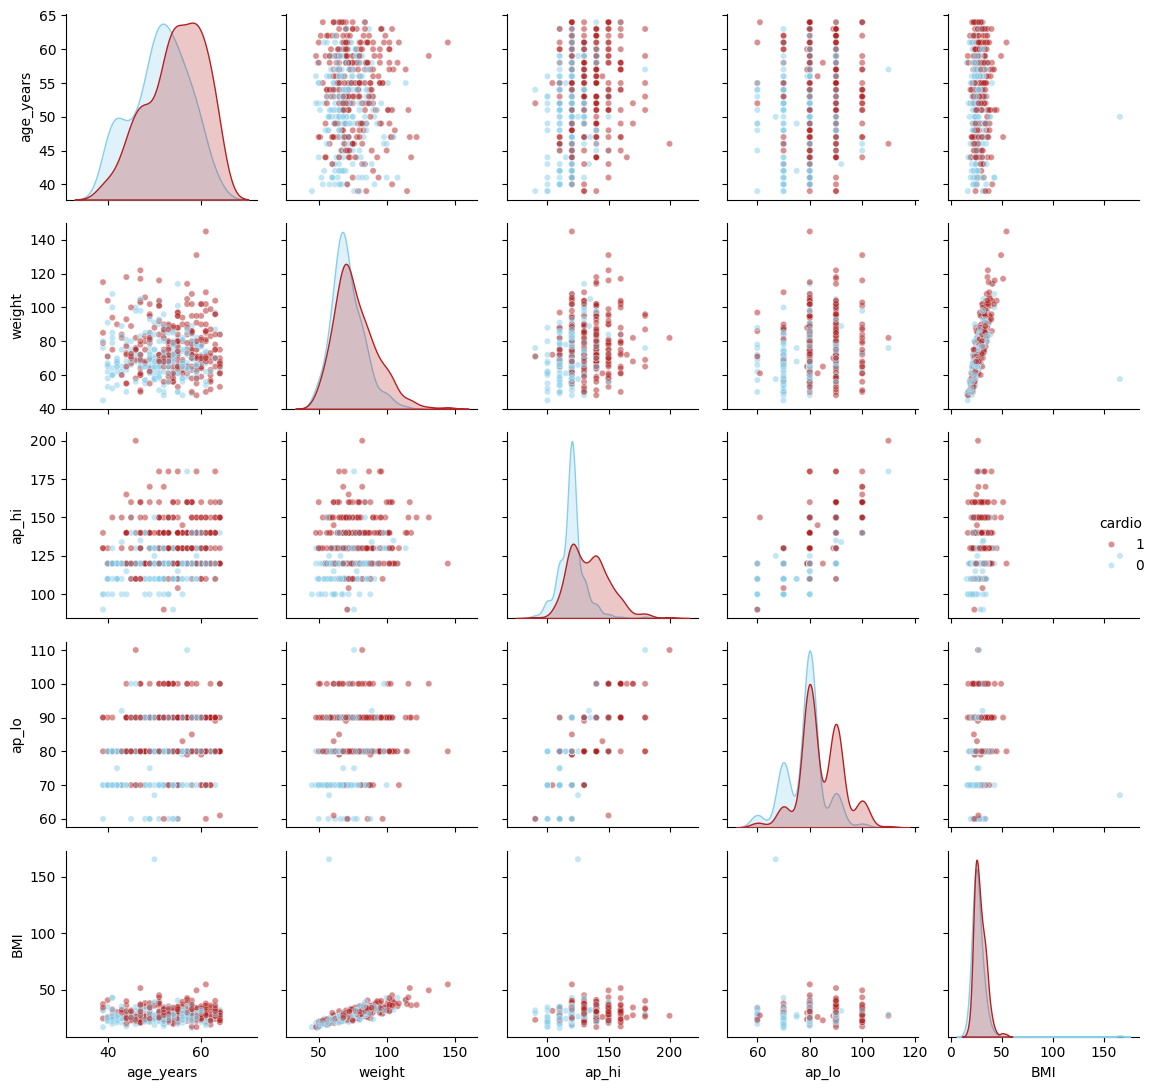

In [34]:
# Variables numéricas relevantes
variables = ["age_years", "weight", "ap_hi", "ap_lo", "BMI"]

# Filtrado clínico simple# Filtrado clínico
df_filtrado = df[
    (df["weight"] >= 40) & (df["weight"] <= 150) &
    (df["ap_hi"] >= 90) & (df["ap_hi"] <= 200) &
    (df["ap_lo"] >= 40) & (df["ap_lo"] <= 130)
].copy()

# Convertir cardio a string para evitar errores en la leyenda
df_filtrado["cardio"] = df_filtrado["cardio"].astype(str)

# Limitar cantidad de muestras para evitar bloqueo
df_filtrado = df_filtrado.sample(500, random_state=42)

# Pairplot
sns.pairplot(
    data=df_filtrado,
    vars=variables,
    hue="cardio",
    palette={"0": "skyblue", "1": "firebrick"},
    diag_kind="kde",
    plot_kws={"alpha": 0.5, "s": 20},
    height=2.2
)
plt.tight_layout()
plt.show()


